## Question 1

Define the z-statistic and explain its relationship to the standard normal distribution. How is the z-statistic used in hypothesis testing?

In [2]:
# The z-statistic (z-score) measures how many standard deviations an observation is from the mean.
# Formula: z = (X - mu) / sigma
# Where X is your sample value or mean, mu is the population mean, and sigma is the standard deviation.
# The z-statistic corresponds to the standard normal distribution (mean=0, std=1).
# In hypothesis testing, it tells us how extreme our observed value is under the null hypothesis.

X = 110  # sample value
mu = 100  # population mean
sigma = 15  # population std dev
z = (X - mu) / sigma
print(f"Z-statistic: {z:.2f}")

Z-statistic: 0.67


## Question 2

What is a p-value, and how is it used in hypothesis testing? What does it mean if the p-value is very small (e.g., 0.01)?

In [5]:
# The p-value is the probability of observing test results at least as extreme as the observed results, under the null hypothesis.
# A small p-value (e.g., 0.01) suggests strong evidence against the null hypothesis.
from scipy.stats import norm
z = 2.5
p_value = 2 * (1 - norm.cdf(abs(z)))  # two-tailed
print(f"P-value: {p_value:.4f}")

P-value: 0.0124


## Question 3

Compare and contrast the binomial and Bernoulli distributions.

In [8]:
# A Bernoulli distribution models a single success/failure experiment (n=1, parameter p).
# A binomial distribution generalizes this to n independent trials with probability p.
from scipy.stats import bernoulli, binom
p = 0.7
n = 5
# Bernoulli: single trial
print("Bernoulli Probabilities:")
print(f"P(X=1): {bernoulli.pmf(1, p)}; P(X=0): {bernoulli.pmf(0, p)}")
# Binomial: 5 trials
print("Binomial Probabilities for k=0 to 3:")
for k in range(4):
    print(f"P(X={k}): {binom.pmf(k, n, p):.4f}")

Bernoulli Probabilities:
P(X=1): 0.7; P(X=0): 0.30000000000000004
Binomial Probabilities for k=0 to 3:
P(X=0): 0.0024
P(X=1): 0.0283
P(X=2): 0.1323
P(X=3): 0.3087


## Question 4

Under what conditions is the binomial distribution used, and how does it relate to the Bernoulli distribution?

In [11]:
# Binomial is used when:
#  - Each trial is independent
#  - Each trial has two outcomes (success/failure)
#  - Fixed number of trials (n)
#  - Probability of success (p) is constant.
# Bernoulli is a special case of Binomial with n=1.
n = 1
p = 0.7
print(f"Bernoulli P(X=1): {bernoulli.pmf(1, p)}")
print(f"Binomial (n=1) P(X=1): {binom.pmf(1, n, p)}")

Bernoulli P(X=1): 0.7
Binomial (n=1) P(X=1): 0.7


## Question 5

What are the key properties of the Poisson distribution, and when is it appropriate to use this distribution?

In [14]:
# Poisson models the number of events happening in a fixed interval of time/space,
# given a known constant mean rate (lambda), with independent events.
# Mean = Variance = lambda.
# Use Poisson when events are independent, rare, and the probability of two events at the exact same instant is zero.
from scipy.stats import poisson
lam = 4
print(f"Probability of observing 2 events: {poisson.pmf(2, lam):.4f}")
print(f"Mean: {lam}, Variance: {lam}")

Probability of observing 2 events: 0.1465
Mean: 4, Variance: 4


## Question 6

Define the terms "probability distribution" and "probability density function" (PDF). How does a PDF differ from a probability mass function (PMF)?

In [17]:
# Probability distribution: Describes how probabilities are distributed over possible values of a random variable.
# PDF: For continuous variables, describes relative likelihood at each value; total area under the curve = 1.
# PMF: For discrete variables, gives actual probability for each value (sum = 1).
from scipy.stats import norm, binom
print(f"Normal PDF at x=0: {norm.pdf(0):.4f}")
print(f"Binomial PMF n=5, p=0.5, k=2: {binom.pmf(2, 5, 0.5):.4f}")

Normal PDF at x=0: 0.3989
Binomial PMF n=5, p=0.5, k=2: 0.3125


## Question 7

Explain the Central Limit Theorem (CLT) with example.

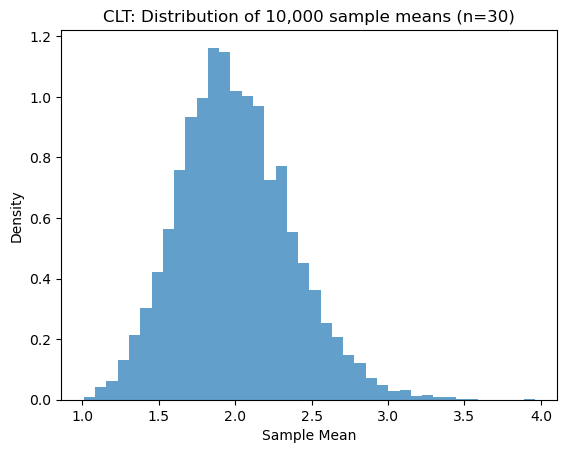

In [20]:
# CLT: For large sample sizes, the sampling distribution of the mean is approximately normal,
# regardless of the population's distribution.
import numpy as np
import matplotlib.pyplot as plt
means = [np.mean(np.random.exponential(scale=2, size=30)) for _ in range(10000)]
plt.hist(means, bins=40, density=True, alpha=0.7)
plt.title("CLT: Distribution of 10,000 sample means (n=30)")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.show()

## Question 8

Compare z-scores and t-scores. When should you use a z-score, and when should a t-score be applied instead?

In [22]:
# Use a z-score when the population standard deviation is known and sample size is large (n > 30).
# Use a t-score when the population std dev is unknown and sample size is small (n <= 30).
# t-distribution has fatter tails. As n increases, t approaches z.
from scipy.stats import t
sample_mean = 107
pop_mean = 100
sample_std = 12
n = 10
t_score = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))
print(f"T-score: {t_score:.2f}")

T-score: 1.84


## Question 9

Given a sample mean of 105, a population mean of 100, a standard deviation of 15, and a sample size of 25, calculate the z-score and p-value. Based on a significance level of 0.05, do you reject or fail to reject the null hypothesis?

Task: Write Python code to calculate the z-score and p-value for the given data.
Objective: Apply the formula for the z-score and interpret the p-value for hypothesis testing.

In [24]:
sample_mean = 105
pop_mean = 100
std_dev = 15
n = 25
z_score = (sample_mean - pop_mean) / (std_dev / np.sqrt(n))
from scipy.stats import norm
p_val = 2 * (1 - norm.cdf(abs(z_score)))  # two-tailed test
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_val:.4f}")
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis at alpha=0.05.")
else:
    print("Fail to reject the null hypothesis at alpha=0.05.")

Z-score: 1.67
P-value: 0.0956
Fail to reject the null hypothesis at alpha=0.05.


## Question 10

Simulate a binomial distribution with 10 trials and a probability of success of 0.6 using Python. Generate 1,000 samples and plot the distribution. What is the expected mean and variance?

Task: Use Python to generate the data, plot the distribution, and calculate the mean and variance.
Objective: Understand the properties of a binomial distribution and verify them through simulation.

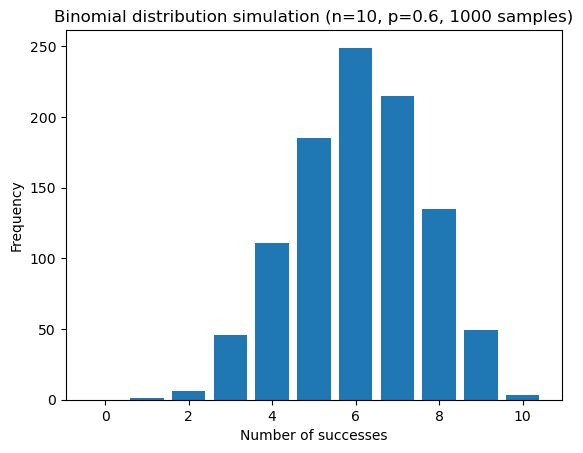

Sample mean: 6.07
Theoretical mean: 6.0
Sample variance: 2.40
Theoretical variance: 2.40


In [26]:
n = 10
p = 0.6
np.random.seed(42)
samples = np.random.binomial(n, p, 1000)
import matplotlib.pyplot as plt
plt.hist(samples, bins=range(0, n+2), align='left', rwidth=0.8)
plt.xlabel("Number of successes")
plt.ylabel("Frequency")
plt.title("Binomial distribution simulation (n=10, p=0.6, 1000 samples)")
plt.show()
print(f"Sample mean: {np.mean(samples):.2f}")
print(f"Theoretical mean: {n * p}")
print(f"Sample variance: {np.var(samples):.2f}")
print(f"Theoretical variance: {n * p * (1-p):.2f}")